# Analysis of b_eff results from HPCC

This notebook analyses the results of the latency/bandwidth measurements from the HPCC (HPC Challenge) benchmarks for a variety of HPC systems.

## Setup section

Load required modules and define useful functions

In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,6)
import seaborn as sns
sns.set(font_scale=1.5, context="paper", style="white", font="serif")

In [2]:
import sys
sys.path.append('../../../python-modules')

In [3]:
from synthanalysis import hpcc

## Results file setup

### ARCHER

In [4]:
archercpn = 24
archerfiles = {2:'../beff_results/ARCHER/nodes2ppn24_201708301007_hpccoutf.txt',
               4:'../beff_results/ARCHER/nodes4ppn24_201708301006_hpccoutf.txt',
               8:'../beff_results/ARCHER/nodes8ppn24_201708301005_hpccoutf.txt',
               16:'../beff_results/ARCHER/nodes16ppn24_201708301004_hpccoutf.txt',
               32:'../beff_results/ARCHER/nodes32ppn24_201708301003_hpccoutf.txt',
               64:'../beff_results/ARCHER/nodes64ppn24_hpccoutf.txt',
               128:'../beff_results/ARCHER/nodes128ppn24_hpccoutf.txt',
               256:'../beff_results/ARCHER/nodes256ppn24_hpccoutf.txt'}

### Cirrus

In [5]:
cirruscpn = 36
cirrusfiles = {2:'../beff_results/Cirrus/MPT214/nodes2ppn36_201709182205_hpccoutf.txt',
               4:'../beff_results/Cirrus/MPT214/nodes4ppn36_201709182205_hpccoutf.txt',
               8:'../beff_results/Cirrus/MPT214/nodes8ppn36_201709182204_hpccoutf.txt',
               16:'../beff_results/Cirrus/MPT214/nodes16ppn36_201709182203_hpccoutf.txt',
               32:'../beff_results/Cirrus/MPT214/nodes32ppn36_201709182202_hpccoutf.txt'}

### Athena

In [6]:
athenacpn = 28
athenafiles = {2:'../beff_results/Athena/nodes2ppn28_201708301452_hpccoutf.txt',
               4:'../beff_results/Athena/nodes4ppn28_201708301452_hpccoutf.txt',
               8:'../beff_results/Athena/nodes8ppn28_201708301451_hpccoutf.txt',
               16:'../beff_results/Athena/nodes16ppn28_201708301450_hpccoutf.txt'}

### Thomas (MMMHub)

In [7]:
thomascpn = 24
thomasfiles = {2:'../beff_results/MMM_Thomas/nodes2ppn24_201709192139_hpccoutf.txt',
               4:'../beff_results/MMM_Thomas/nodes4ppn24_201709192139_hpccoutf.txt',
               8:'../beff_results/MMM_Thomas/nodes8ppn24_201709192138_hpccoutf.txt',
               16:'../beff_results/MMM_Thomas/nodes16ppn24_201709192137_hpccoutf.txt'}

### CSD3-Skylake

In [8]:
csd3scpn = 32
csd3sfiles = {2:'../beff_results/CSD3Skylake/nodes2ppn32_201711232059_hpccoutf.txt',
              4:'../beff_results/CSD3Skylake/nodes4ppn32_201711232109_hpccoutf.txt',
              8:'../beff_results/CSD3Skylake/nodes8ppn32_201711232113_hpccoutf.txt',
              16:'../beff_results/CSD3Skylake/nodes16ppn32_201711232116_hpccoutf.txt',
              16:'../beff_results/CSD3Skylake/nodes32ppn32_201711232118_hpccoutf.txt'
             }

## RandomRing Results and Analysis

In [9]:
archercores, archer_rrbw, archer_rrlat = hpcc.calcbeffperf(archerfiles, archercpn, restype='rr')

Random Ring results:
          Nodes           Cores      BW (GiB/s)       Lat. (us)
          =====           =====      ==========       =========
              2              48           1.344           1.097
              4              96           1.319           1.299
              8             192           1.281           1.431
             16             384           1.205           1.800
             32             768           1.210           1.657
             64            1536           1.198           2.348
            128            3072           1.183           2.929
            256            6144           1.094           3.850


In [10]:
cirruscores, cirrus_rrbw, cirrus_rrlat = hpcc.calcbeffperf(cirrusfiles, cirruscpn, restype='rr')

Random Ring results:
          Nodes           Cores      BW (GiB/s)       Lat. (us)
          =====           =====      ==========       =========
              2              72           1.636           0.933
              4             144           1.406           1.115
              8             288           1.365           1.078
             16             576           1.339           1.285
             32            1152           1.339           1.459


In [11]:
athenacores, athena_rrbw, athena_rrlat = hpcc.calcbeffperf(athenafiles, athenacpn, restype='rr')

Random Ring results:
          Nodes           Cores      BW (GiB/s)       Lat. (us)
          =====           =====      ==========       =========
              2              56           1.643           0.799
              4             112           1.651           0.846
              8             224           1.628           0.906
             16             448           1.589           0.954


In [12]:
thomascores, thomas_rrbw, thomas_rrlat = hpcc.calcbeffperf(thomasfiles, thomascpn, restype='rr')

Random Ring results:
          Nodes           Cores      BW (GiB/s)       Lat. (us)
          =====           =====      ==========       =========
              2              48           0.273           1.502
              4              96           0.287           1.407
              8             192           0.268           1.502
             16             384           0.266           1.502


In [13]:
csd3scores, csd3s_rrbw, csd3s_rrlat = hpcc.calcbeffperf(csd3sfiles, csd3scpn, restype='rr')

Random Ring results:
          Nodes           Cores      BW (GiB/s)       Lat. (us)
          =====           =====      ==========       =========
              2              64           1.469           1.277
              4             128           1.416           1.362
              8             256           0.834           1.362
             16             512           0.793           1.431


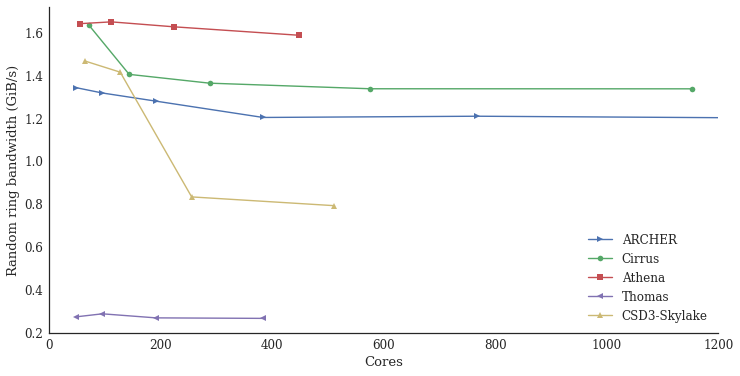

In [14]:
plt.plot(archercores, archer_rrbw, '>-', label='ARCHER')
plt.plot(cirruscores, cirrus_rrbw, 'o-', label='Cirrus')
plt.plot(athenacores, athena_rrbw, 's-', label='Athena')
plt.plot(thomascores, thomas_rrbw, '<-', label='Thomas')
plt.plot(csd3scores, csd3s_rrbw, '^-', label='CSD3-Skylake')
plt.xlabel('Cores')
plt.ylabel('Random ring bandwidth (GiB/s)')
plt.xlim(0,1200)
plt.legend(loc='best')
sns.despine()
plt.savefig("beff_rr_bw.png", dpi=300)

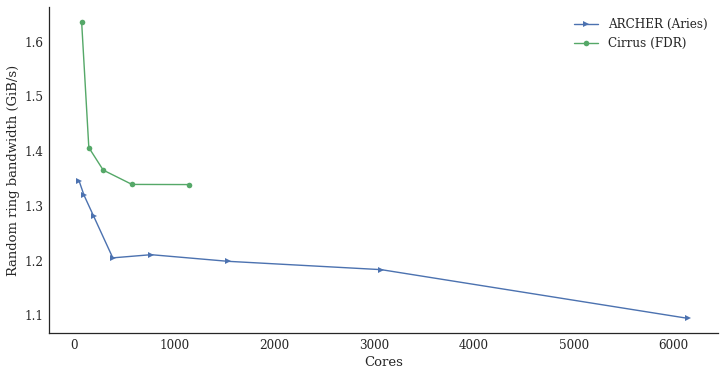

In [15]:
plt.plot(archercores, archer_rrbw, '>-', label='ARCHER (Aries)')
plt.plot(cirruscores, cirrus_rrbw, 'o-', label='Cirrus (FDR)')
plt.xlabel('Cores')
plt.ylabel('Random ring bandwidth (GiB/s)')
plt.legend(loc='best')
sns.despine()

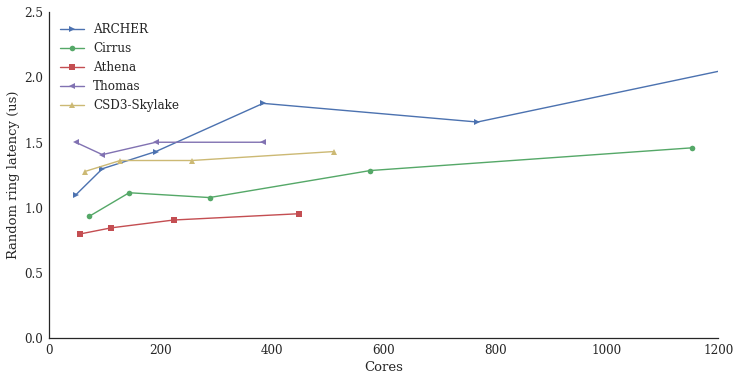

In [25]:
plt.plot(archercores, archer_rrlat, '>-', label='ARCHER')
plt.plot(cirruscores, cirrus_rrlat, 'o-', label='Cirrus')
plt.plot(athenacores, athena_rrlat, 's-', label='Athena')
plt.plot(thomascores, thomas_rrlat, '<-', label='Thomas')
plt.plot(csd3scores, csd3s_rrlat, '^-', label='CSD3-Skylake')
plt.xlabel('Cores')
plt.ylabel('Random ring latency (us)')
plt.xlim(0,1200)
plt.ylim(0,2.5)
plt.legend(loc='best')
sns.despine()
plt.savefig("beff_rr_lat.png", dpi=300)

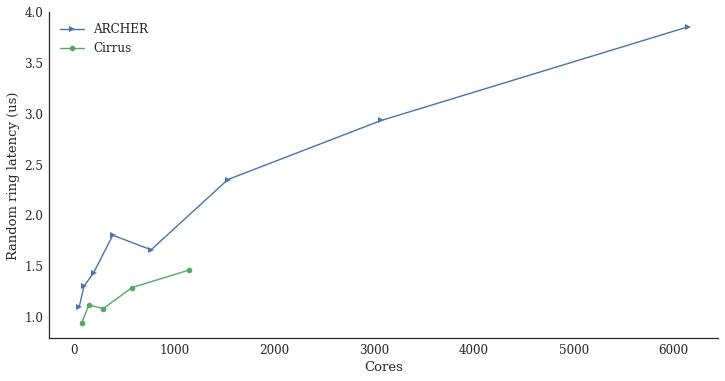

In [17]:
plt.plot(archercores, archer_rrlat, '>-', label='ARCHER')
plt.plot(cirruscores, cirrus_rrlat, 'o-', label='Cirrus')
plt.xlabel('Cores')
plt.ylabel('Random ring latency (us)')
plt.legend(loc='best')
sns.despine()

## PingPong Results and Analysis

In [18]:
archercores, archer_ppbw, archer_pplat = hpcc.calcbeffperf(archerfiles, archercpn, restype='pp')

          Nodes           Cores      BW (GiB/s)       Lat. (us)
          =====           =====      ==========       =========
              2              48           7.858           1.854
              4              96           3.491           3.113
              8             192           3.875           2.477
             16             384           1.365           3.113
             32             768           1.454           4.873
             64            1536           2.292           4.331
            128            3072           2.530           3.874
            256            6144           1.991           4.086


In [19]:
cirruscores, cirrus_ppbw, cirrus_pplat = hpcc.calcbeffperf(cirrusfiles, cirruscpn, restype='pp')

          Nodes           Cores      BW (GiB/s)       Lat. (us)
          =====           =====      ==========       =========
              2              72           2.486           1.715
              4             144           2.480           1.921
              8             288           2.469           1.970
             16             576           2.423           2.410
             32            1152           1.678           2.881


In [20]:
athenacores, athena_ppbw, athena_pplat = hpcc.calcbeffperf(athenafiles, athenacpn, restype='pp')

          Nodes           Cores      BW (GiB/s)       Lat. (us)
          =====           =====      ==========       =========
              2              56           9.966           1.351
              4             112           9.912           1.417
              8             224           9.712           1.501
             16             448           9.689           1.470


In [21]:
thomascores, thomas_ppbw, thomas_pplat = hpcc.calcbeffperf(thomasfiles, thomascpn, restype='pp')

          Nodes           Cores      BW (GiB/s)       Lat. (us)
          =====           =====      ==========       =========
              2              48           5.687           1.917
              4              96           5.638           1.914
              8             192           5.541          11.914
             16             384           3.610          10.365


In [22]:
csd3scores, csd3s_ppbw, csd3s_pplat = hpcc.calcbeffperf(csd3sfiles, csd3scpn, restype='pp')

          Nodes           Cores      BW (GiB/s)       Lat. (us)
          =====           =====      ==========       =========
              2              64          10.850           1.241
              4             128           7.877           1.647
              8             256           6.037           1.258
             16             512           5.938           1.669


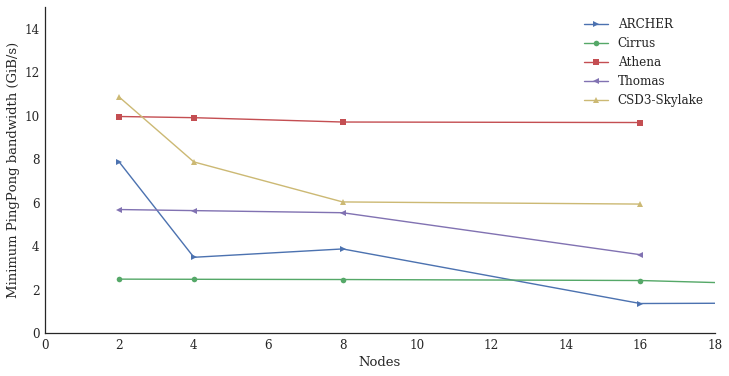

In [23]:
plt.plot([x/archercpn for x in archercores], archer_ppbw, '>-', label='ARCHER')
plt.plot([x/cirruscpn for x in cirruscores], cirrus_ppbw, 'o-', label='Cirrus')
plt.plot([x/athenacpn for x in athenacores], athena_ppbw, 's-', label='Athena')
plt.plot([x/thomascpn for x in thomascores], thomas_ppbw, '<-', label='Thomas')
plt.plot([x/csd3scpn for x in csd3scores], csd3s_ppbw, '^-', label='CSD3-Skylake')
plt.xlabel('Nodes')
plt.ylabel('Minimum PingPong bandwidth (GiB/s)')
plt.xlim(0,18)
plt.ylim(0,15)
plt.legend(loc='best')
sns.despine()
plt.savefig("beff_pp_bw.png", dpi=300)

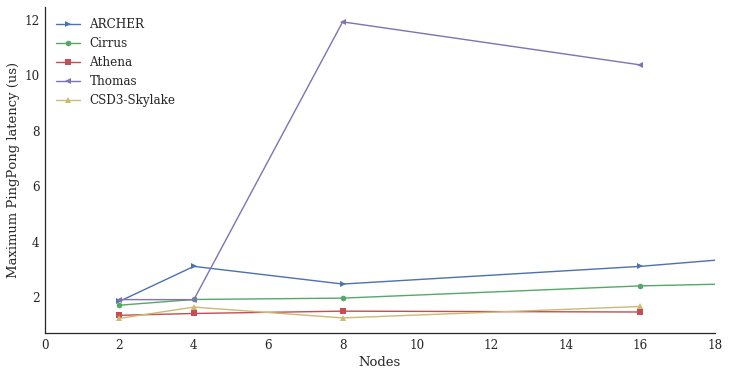

In [24]:
plt.plot([x/archercpn for x in archercores], archer_pplat, '>-', label='ARCHER')
plt.plot([x/cirruscpn for x in cirruscores], cirrus_pplat, 'o-', label='Cirrus')
plt.plot([x/athenacpn for x in athenacores], athena_pplat, 's-', label='Athena')
plt.plot([x/thomascpn for x in thomascores], thomas_pplat, '<-', label='Thomas')
plt.plot([x/csd3scpn for x in csd3scores], csd3s_pplat, '^-', label='CSD3-Skylake')
plt.xlabel('Nodes')
plt.ylabel('Maximum PingPong latency (us)')
plt.xlim(0,18)
# plt.ylim(0,4)
plt.legend(loc='best')
sns.despine()
plt.savefig("beff_pp_lat.png", dpi=300)